In [20]:
#importación de las librerías necesarias para el desarrollo del trabajo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
%matplotlib inline

In [3]:
#Carga de los archivos correspondientes
hosp_prueba = pd.read_csv('../Datathon-main/hospitalizaciones_test.csv')
hosp_entrenamiento = pd.read_csv('../Datathon-main/hospitalizaciones_train.csv')

In [4]:
#Análisis exploratorio de los datos
#Consulta de las primeras 5 líneas
hosp_prueba.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit
0,3,gynecology,F,Dr Olivia,10,2858,21-30,Female,Trauma,Moderate,Other,2,No,4749.640225
1,2,TB & Chest disease,E,Dr John,4,65657,51-60,Female,Trauma,Moderate,Asthama,2,Yes,4122.261324
2,2,radiotherapy,E,Dr John,7,45598,51-60,Other,Trauma,Moderate,None,3,No,5459.067882
3,2,gynecology,F,Dr Olivia,1,31132,21-30,Female,Trauma,Moderate,None,2,Yes,3987.033318
4,2,anesthesia,A,Dr John,7,125021,51-60,Female,Trauma,Extreme,Diabetes,2,No,4770.789695


In [5]:
hosp_entrenamiento.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


In [6]:
#Consulta de los tamaños de los archivos, cantidad de filas y columnas
hosp_entrenamiento.shape

(410000, 15)

In [7]:
hosp_prueba.shape

(90000, 14)

In [8]:
#Consulta de los tipos de datos de las columnas
hosp_entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  410000 non-null  int64  
 1   Department                         410000 non-null  object 
 2   Ward_Facility_Code                 410000 non-null  object 
 3   doctor_name                        410000 non-null  object 
 4   staff_available                    410000 non-null  int64  
 5   patientid                          410000 non-null  int64  
 6   Age                                410000 non-null  object 
 7   gender                             410000 non-null  object 
 8   Type of Admission                  410000 non-null  object 
 9   Severity of Illness                410000 non-null  object 
 10  health_conditions                  410000 non-null  object 
 11  Visitors with Patient              4100

In [9]:
hosp_prueba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Available Extra Rooms in Hospital  90000 non-null  int64  
 1   Department                         90000 non-null  object 
 2   Ward_Facility_Code                 90000 non-null  object 
 3   doctor_name                        90000 non-null  object 
 4   staff_available                    90000 non-null  int64  
 5   patientid                          90000 non-null  int64  
 6   Age                                90000 non-null  object 
 7   gender                             90000 non-null  object 
 8   Type of Admission                  90000 non-null  object 
 9   Severity of Illness                90000 non-null  object 
 10  health_conditions                  90000 non-null  object 
 11  Visitors with Patient              90000 non-null  int

In [10]:
#Se ve si existen valores nulos
hosp_entrenamiento.isna().sum()

Available Extra Rooms in Hospital    0
Department                           0
Ward_Facility_Code                   0
doctor_name                          0
staff_available                      0
patientid                            0
Age                                  0
gender                               0
Type of Admission                    0
Severity of Illness                  0
health_conditions                    0
Visitors with Patient                0
Insurance                            0
Admission_Deposit                    0
Stay (in days)                       0
dtype: int64

In [11]:
hosp_prueba.isna().sum()

Available Extra Rooms in Hospital    0
Department                           0
Ward_Facility_Code                   0
doctor_name                          0
staff_available                      0
patientid                            0
Age                                  0
gender                               0
Type of Admission                    0
Severity of Illness                  0
health_conditions                    0
Visitors with Patient                0
Insurance                            0
Admission_Deposit                    0
dtype: int64

In [12]:
#Se ve si existen valores duplicados
hosp_entrenamiento[hosp_entrenamiento.duplicated(keep=False)]

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)


In [13]:
hosp_prueba[hosp_prueba.duplicated(keep=False)]

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit


In [14]:
#Consulta de las métricas
hosp_entrenamiento.describe()

,Available Extra Rooms in Hospital,staff_available,patientid,Visitors with Patient,Admission_Deposit,Stay (in days)
count,410000.000000,410000.000000,410000.000000,410000.000000,410000.000000,410000.000000
mean,3.639376,5.020946,63095.940020,3.552520,4723.419239,12.378193
std,2.701702,3.158018,41686.175937,2.247459,1047.420292,7.905618
min,0.000000,0.000000,-3146.000000,0.000000,1654.005148,3.000000
25%,2.000000,2.000000,25405.000000,2.000000,4072.638351,8.000000
50%,3.000000,5.000000,57736.000000,3.000000,4627.488745,9.000000
75%,4.000000,8.000000,103278.250000,4.000000,5092.349430,11.000000
max,24.000000,10.000000,134400.000000,32.000000,10104.726390,51.000000


In [16]:
#Se eliminan las columnas que no considero necesarias para si la estadía del paciente va a ser larga o no.
hosp_entrenamiento = hosp_entrenamiento.drop(columns=['patientid','Visitors with Patient'])
hosp_entrenamiento.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,41-50,Female,Trauma,Extreme,Diabetes,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,31-40,Female,Trauma,Minor,Heart disease,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,21-30,Female,Trauma,Extreme,Diabetes,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,31-40,Female,Urgent,Moderate,None,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,71-80,Male,Trauma,Moderate,Diabetes,No,5169.269637,34


In [17]:
#Se crea una columna llamada 'long_stay' que toma valores binarios, donde 1 significa que el paciente 
#estuvo más de 8 días y 0 que estuvo menos.
hosp_entrenamiento["long_stay"] = np.where(hosp_entrenamiento["Stay (in days)"]>8,1,0)

In [18]:
hosp_entrenamiento.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,Insurance,Admission_Deposit,Stay (in days),long_stay
0,4,gynecology,D,Dr Sophia,0,41-50,Female,Trauma,Extreme,Diabetes,Yes,2966.408696,8,0
1,4,gynecology,B,Dr Sophia,2,31-40,Female,Trauma,Minor,Heart disease,No,3554.835677,9,1
2,2,gynecology,B,Dr Sophia,8,21-30,Female,Trauma,Extreme,Diabetes,Yes,5624.733654,7,0
3,4,gynecology,D,Dr Olivia,7,31-40,Female,Urgent,Moderate,None,No,4814.149231,8,0
4,2,anesthesia,E,Dr Mark,10,71-80,Male,Trauma,Moderate,Diabetes,No,5169.269637,34,1


In [21]:
'''Se utiliza label encoder para transformar etiquetas no numéricas (siempre y cuando sean comparables y con 
hash) en etiquetas numéricas. Es decir, se tranforman las variables categóricas en enteros para que el 
modelo pueda trabajar con ellas.'''

le = preprocessing.LabelEncoder()

le.fit(hosp_entrenamiento['Department'])
hosp_entrenamiento['Department'] = le.transform(hosp_entrenamiento['Department'])

le.fit(hosp_entrenamiento['Ward_Facility_Code'])
hosp_entrenamiento['Ward_Facility_Code'] = le.transform(hosp_entrenamiento['Ward_Facility_Code'])

le.fit(hosp_entrenamiento['doctor_name'])
hosp_entrenamiento['doctor_name'] = le.transform(hosp_entrenamiento['doctor_name'])

le.fit(hosp_entrenamiento['Age'])
hosp_entrenamiento['Age'] = le.transform(hosp_entrenamiento['Age'])

le.fit(hosp_entrenamiento['gender'])
hosp_entrenamiento['gender'] = le.transform(hosp_entrenamiento['gender'])

le.fit(hosp_entrenamiento['Type of Admission'])
hosp_entrenamiento['Type of Admission'] = le.transform(hosp_entrenamiento['Type of Admission'])

le.fit(hosp_entrenamiento['Severity of Illness'])
hosp_entrenamiento['Severity of Illness'] = le.transform(hosp_entrenamiento['Severity of Illness'])

le.fit(hosp_entrenamiento['health_conditions'])
hosp_entrenamiento['health_conditions'] = le.transform(hosp_entrenamiento['health_conditions'])

le.fit(hosp_entrenamiento['Insurance'])
hosp_entrenamiento['Insurance'] = le.transform(hosp_entrenamiento['Insurance'])

In [22]:
hosp_entrenamiento.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,Insurance,Admission_Deposit,Stay (in days),long_stay
0,4,2,3,8,0,4,0,1,0,1,1,2966.408696,8,0
1,4,2,1,8,2,3,0,1,1,2,0,3554.835677,9,1
2,2,2,1,8,8,2,0,1,0,1,1,5624.733654,7,0
3,4,2,3,4,7,3,0,2,2,4,0,4814.149231,8,0
4,2,1,4,2,10,7,1,1,2,1,0,5169.269637,34,1


In [27]:
#Se definen X e y. Para X utilizamos todas las columnas, excepto stay in days y long_stay.
#para y se selecciona solo long_stay
X = hosp_entrenamiento.iloc[:,0:12]
y = hosp_entrenamiento.iloc[:,-1]

In [49]:
#Se comienza a dividir los datos para entrenar el modelo.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [50]:
#Se llama al algoritmo de regresión logística
logreg = LogisticRegression(max_iter = len(X_train))
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [51]:
y_pred

array([1, 1, 1, ..., 1, 0, 0])

In [52]:
#Se prueba la matriz de confusión para ver el grado de acierto del modelo
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)

Text(0.5, 1.1, 'Matriz de confusion')

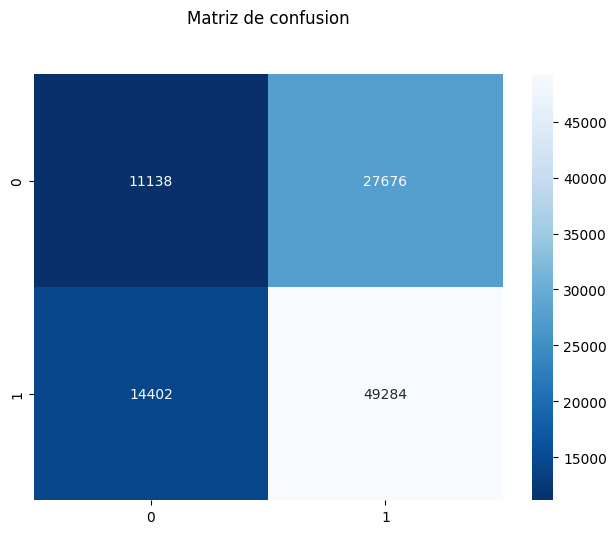

In [53]:
class_names = [0,1]
fig,ax = plt.subplots() #Obtengo las variables figura y ejes del gráfico 
tick_marks = np.arange(len(class_names))  #definimos los valores que van a tener las líneas de guía
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names) #definimos los tick marks en el gráfico

#Cómo se muestra la matriz de confusión a través de un heatmap, creando un dataframe con la matriz de confusión
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap='Blues_r', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz de confusion', y=1.1)

In [54]:
#Se calcula el accuracy de la matriz de confusión
metrics.accuracy_score(y_test,y_pred)

0.5894829268292683

In [55]:
#Se calcula el recall de la matriz de confusión
metrics.recall_score(y_test, y_pred)

0.7738592469302515